# GL Dataset Analysis – Data Loading & Cleaning

## Base CSV Files

Source folders:

C:\Users\mirangaa\Spaces_GL_Analysis\GLData2023

C:\Users\mirangaa\Spaces_GL_Analysis\GLData202425

* Each folder contains CSV files with the same columns.

* Base dataset combined for analysis.

## Lookup Files

Lookup folder: C:\Users\mirangaa\Spaces_GL_Analysis

Files:

* GLCodes.csv → GL_Description

* CostCtr.csv → CostCtr_Description

* Brands.csv → Brand_Description

* Loaded with latin1 encoding to avoid Unicode errors.

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# -----------------------------
# Base CSV folders
base_folders = [
    Path(r"C:\Users\mirangaa\Spaces_GL_Analysis\GLData2023"),
    Path(r"C:\Users\mirangaa\Spaces_GL_Analysis\GLData202425")
]

# Load all CSVs from both folders and combine
dfs = []
for folder in base_folders:
    csv_files = list(folder.glob("*.csv"))
    if not csv_files:
        raise FileNotFoundError(f"No CSV files found in {folder}")
    for f in csv_files:
        df_chunk = pd.read_csv(f, dtype={'GLCode': str}, low_memory=False)
        dfs.append(df_chunk)

# Combine all base CSVs
df = pd.concat(dfs, ignore_index=True)
print(f"Combined base dataset shape: {df.shape}")

# -----------------------------
# Lookup folder
lookup_folder = Path(r"C:\Users\mirangaa\Spaces_GL_Analysis")

# Load lookup files with latin1 encoding to avoid UnicodeDecodeError
lookup_glcodes_df = pd.read_csv(
    lookup_folder / "GLCodes.csv",
    dtype={'GLCode': str},
    encoding='latin1'
)
lookup_costctr_df = pd.read_csv(
    lookup_folder / "CostCtr.csv",
    dtype={'CostCtr': str},
    encoding='latin1'
)
lookup_brands_df = pd.read_csv(
    lookup_folder / "Brands.csv",
    dtype={'Brand': str},
    encoding='latin1'
)

# -----------------------------
# Standardize column names (strip spaces)
df.columns = df.columns.str.strip()
lookup_glcodes_df.columns = lookup_glcodes_df.columns.str.strip()
lookup_costctr_df.columns = lookup_costctr_df.columns.str.strip()
lookup_brands_df.columns = lookup_brands_df.columns.str.strip()

# Standardize merge keys as strings
df['GLCode'] = df['GLCode'].astype(str).str.strip()
df['CostCtr'] = df['CostCtr'].astype(str).str.strip()
df['Brand'] = df['Brand'].astype(str).str.strip()

lookup_glcodes_df['GLCode'] = lookup_glcodes_df['GLCode'].astype(str).str.strip()
lookup_costctr_df['CostCtr'] = lookup_costctr_df['CostCtr'].astype(str).str.strip()
lookup_brands_df['Brand'] = lookup_brands_df['Brand'].astype(str).str.strip()

# -----------------------------
# Merge lookups into base DataFrame
df = df.merge(lookup_glcodes_df, on="GLCode", how="left")
df = df.merge(lookup_costctr_df, on="CostCtr", how="left")
df = df.merge(lookup_brands_df, on="Brand", how="left")


# -----------------------------
# Save combined dataset as Parquet
output_file = Path(r"C:\Users\mirangaa\Spaces_GL_Analysis\gl_combined_base.parquet")
df.to_parquet(output_file, engine='fastparquet', index=False)
print(f"Base DataFrame saved as Parquet: {output_file}")


Combined base dataset shape: (1225103, 16)
Base DataFrame saved as Parquet: C:\Users\mirangaa\Spaces_GL_Analysis\gl_combined_base.parquet


In [50]:
# Display the first 10 rows
df.tail(10)

,AccDate,CreatedDt,Creatby,GLCode,CostCtr,Brand,Currency,ForexAmt,PostAmount,AccGrp,BalanceSheet,ProfitLoss,AccntRec,AccntPbl,FixedAsst,AccGrpDesc,GL_Description,CostCtr_Description,Brand_Description
1225093,20251230,20251230,ZCHANG,768,20,750,AUD,0.09,0.09,700.0,1.0,0.0,0.0,0.0,0.0,Current liabilities,FTS Provision,Bottling,Monin Mixers
1225094,20251230,20251230,ZCHANG,768,20,995,AUD,0.06,0.06,700.0,1.0,0.0,0.0,0.0,0.0,Current liabilities,FTS Provision,Bottling,OS Juice x 8 Pack
1225095,20251230,20251230,ZCHANG,768,60,750,AUD,-0.03,-0.03,700.0,1.0,0.0,0.0,0.0,0.0,Current liabilities,FTS Provision,Finance,Monin Mixers
1225096,20251230,20251230,ZCHANG,769,20,995,AUD,-0.24,-0.24,700.0,1.0,0.0,0.0,0.0,0.0,Current liabilities,VTS Provision,Bottling,OS Juice x 8 Pack
1225097,20251230,20251230,ZCHANG,769,60,995,AUD,-0.03,-0.03,700.0,1.0,0.0,0.0,0.0,0.0,Current liabilities,VTS Provision,Finance,OS Juice x 8 Pack
1225098,20251230,20251230,ZCHANG,769,70,211,AUD,-0.01,-0.01,700.0,1.0,0.0,0.0,0.0,0.0,Current liabilities,VTS Provision,IT,FMCG Fizz
1225099,20251229,20251229,ZCHANG,131,40,785,AUD,17.85,17.85,100.0,0.0,1.0,0.0,0.0,0.0,Sales,Variable Case Deal,Customer Insights,Kiddy Sips
1225100,20251229,20251229,ZCHANG,131,40,792,AUD,29.14,29.14,100.0,0.0,1.0,0.0,0.0,0.0,Sales,Variable Case Deal,Customer Insights,Lotus Spreads & Sips
1225101,20251229,20251229,ZCHANG,131,60,210,AUD,434.04,434.04,100.0,0.0,1.0,0.0,0.0,0.0,Sales,Variable Case Deal,Finance,National Nectar Co.
1225102,20251229,20251229,ZCHANG,131,60,790,AUD,70.81,70.81,100.0,0.0,1.0,0.0,0.0,0.0,Sales,Variable Case Deal,Finance,Lotus Latte


# Data Cleaning

## Reformat Date columns

The Created Date and Accounting Date columns are in string format. They need to be reformatted to Year, Month, Day and Day of week format before anaylysis can begin

In [51]:
# -----------------------------
# Convert AccDate and CreatedDt to datetime
df['AccDate'] = pd.to_datetime(df['AccDate'], format='%Y%m%d', errors='coerce')
df['CreatedDt'] = pd.to_datetime(df['CreatedDt'], format='%Y%m%d', errors='coerce')

# -----------------------------
# Extract Year, Quarter, Month
for col in ['AccDate', 'CreatedDt']:
    df[f'{col}_Year'] = df[col].dt.year
    df[f'{col}_Quarter'] = df[col].dt.quarter
    df[f'{col}_Month'] = df[col].dt.month
    df[f'{col}_DayOfWeek'] = df[col].dt.dayofweek  # Monday=0, Sunday=6




### Drop 2025 records from the dataframe

For the purposes of this analysis, records for 2025 will be dropped since the year is incomplete and will result in the analysis being skewed

In [75]:
# Drop records where CreatedDt_Year is 2025
df = df[df['CreatedDt_Year'] != 2025]

# Confirm
print(f"Remaining rows after dropping 2025: {df.shape[0]}")


Remaining rows after dropping 2025: 1026677


## Fill missing Cost Centre and Brand values as General
These GL postings are not driven by Cost Centre or Brand

In [76]:
# Fill missing CostCtr_Description and Brand_Description with 'General'
df['CostCtr_Description'] = df['CostCtr_Description'].fillna('General')
df['Brand_Description'] = df['Brand_Description'].fillna('General')



## Remove Traling Spaces in Column Names

In [77]:
# Remove leading/trailing spaces from all column names
df.columns = df.columns.str.strip()

# Now check for missing descriptions
desc_cols = ['GL_Description', 'CostCtr_Description', 'Brand_Description']
missing_desc = df[df[desc_cols].isnull().any(axis=1)]

## Check for missing values

In [79]:
missing_summary = df.isnull().sum()
print(missing_summary[missing_summary > 0])


Series([], dtype: int64)


In [80]:
# Drop rows with any missing values
df = df.dropna()

# Verify
missing_summary_after = df.isnull().sum()
print("Columns with missing values after drop:")
print(missing_summary_after[missing_summary_after > 0])
print(f"Dataset shape after dropping missing rows: {df.shape}")

Columns with missing values after drop:
Series([], dtype: int64)
Dataset shape after dropping missing rows: (1026677, 27)


In [81]:
missing_summary = df.isnull().sum()
print(missing_summary[missing_summary > 0])

Series([], dtype: int64)


## Handle invalid or inconsistent entries

* GLCode, CostCtr, Brand, Currency: strip whitespace, uppercase for consistency
* Numeric columns (ForexAmt, PostAmount, AccntRec, AccntPbl, FixedAsst, BalanceSheet, ProfitLoss)
  
    * Convert to numeric and handle errors:

In [82]:
for col in ['GLCode', 'CostCtr', 'Brand', 'Currency']:
    df[col] = df[col].astype(str).str.strip().str.upper()

numeric_cols = ['ForexAmt','PostAmount','BalanceSheet','ProfitLoss','AccntRec','AccntPbl','FixedAsst']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # invalid entries become NaN


## Check for invalid dates

Check for invalid dates that became NaT after conversion above

In [83]:
invalid_dates = df[df['AccDate'].isna() | df['CreatedDt'].isna()]
print(f"Invalid dates found: {len(invalid_dates)}")


Invalid dates found: 0


### Notes

Data is now ready for period-based grouping, pivoting, and time series analysis.

# GL Dataset Analysis – Planned Analyses
## 1. Period-Based Analysis

Objective: Identify patterns and trends over time.

### Tasks:

* Count postings by Year, Quarter, Month, DayOfWeek.

* Identify most active users and typical posting months.

* Identify users most active on weekends

### Observations

* Wednesday seems to be the busiest day for the finance team
* Although less in comparison, a significant amount of postings happen over the weekend - which is not normal unless these are scheduled automatic posting jobs
* User EKUMAR seems to be the key finance user with a bulk of the postings coming under his name. Most of the weekend postings are also performed by him. Might be worthwhile to investigate if he's overloaded and has to resort to working in the weekend
* User JROBERTS has also been very active. However, there are noticeable variations per user in the heatmap when all months are taken together. Which might indicate resignations and new starters

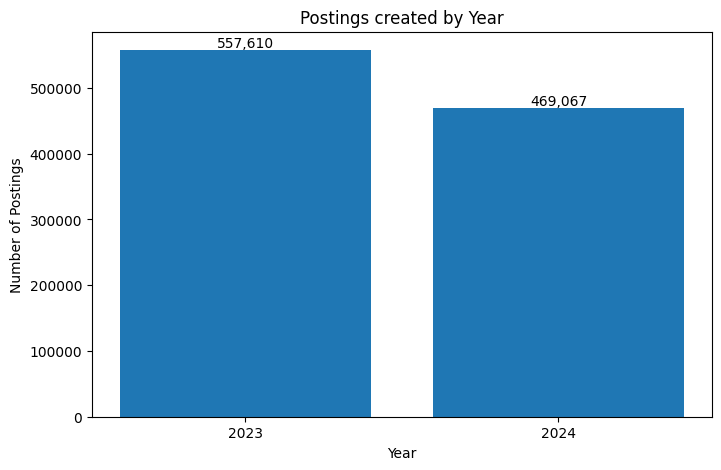

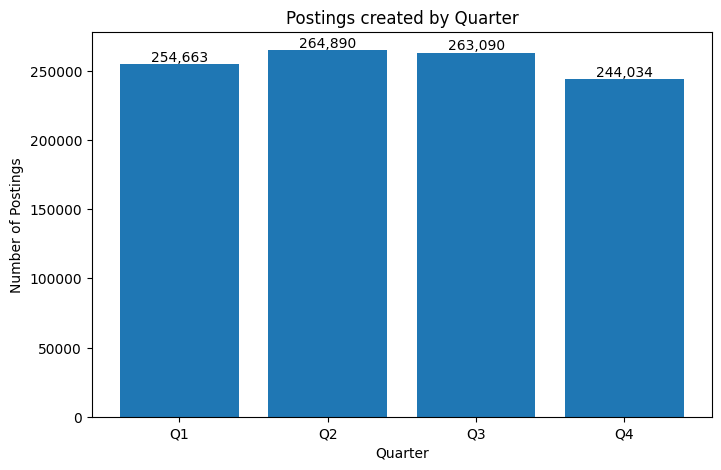

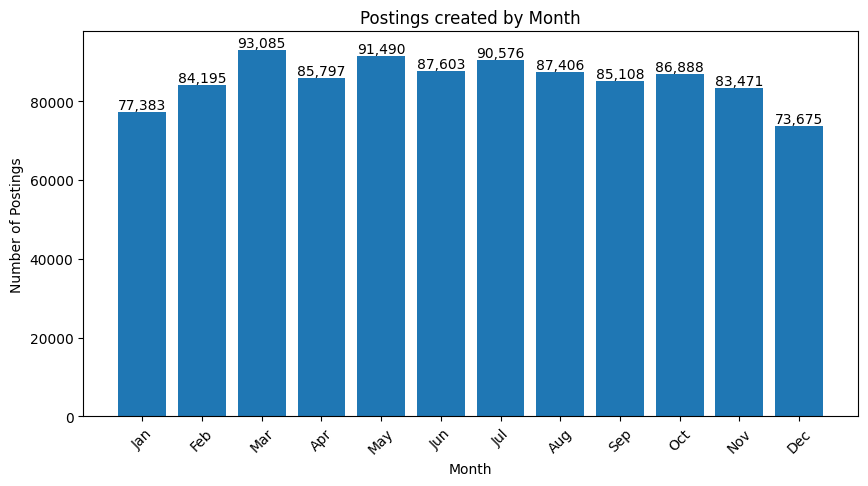

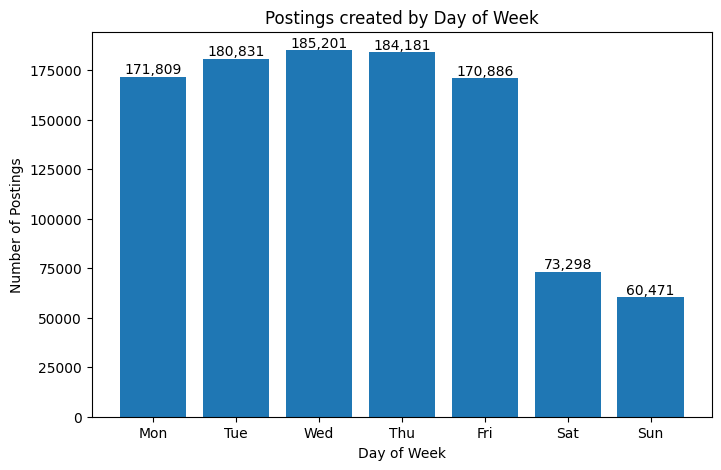

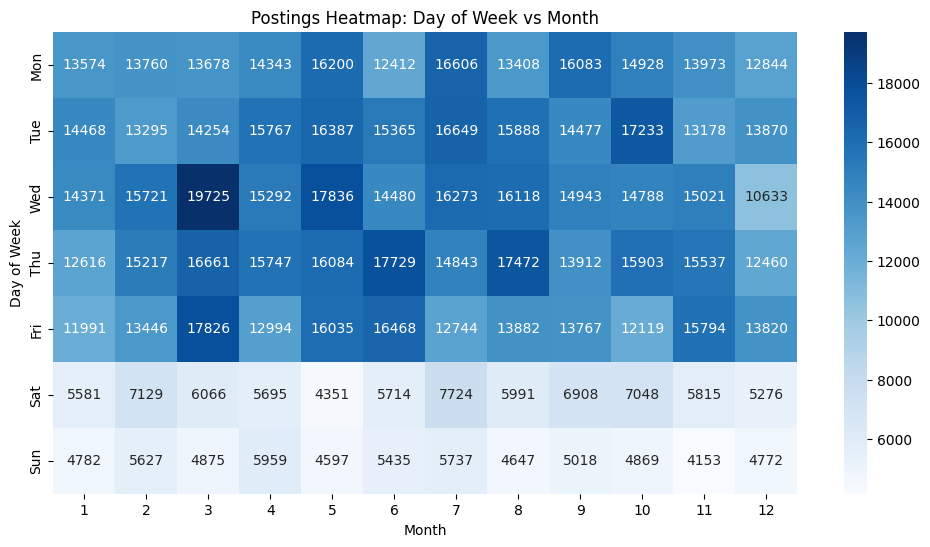

In [84]:
import matplotlib.pyplot as plt

# --- Postings by Year ---
import matplotlib.pyplot as plt

# --- Postings by Year ---
postings_by_year = df.groupby('CreatedDt_Year').size().reset_index(name='Postings')
postings_by_year['CreatedDt_Year'] = postings_by_year['CreatedDt_Year'].astype(str)  # convert to string

fig, ax = plt.subplots(figsize=(8,5))
bars = ax.bar(postings_by_year['CreatedDt_Year'], postings_by_year['Postings'])

# Add data labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:,}', 
            ha='center', va='bottom', fontsize=10)

# Axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Number of Postings')
ax.set_title('Postings created by Year')
plt.xticks(rotation=0)
plt.show()

# --- Postings by Quarter ---
postings_by_quarter = df.groupby('CreatedDt_Quarter').size().reset_index(name='Postings')
postings_by_quarter['CreatedDt_Quarter'] = postings_by_quarter['CreatedDt_Quarter'].astype(str)

fig, ax = plt.subplots(figsize=(8,5))
bars = ax.bar(postings_by_quarter['CreatedDt_Quarter'], postings_by_quarter['Postings'])

# Add data labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:,}', ha='center', va='bottom', fontsize=10)

ax.set_title('Postings created by Quarter')
ax.set_xlabel('Quarter')
ax.set_ylabel('Number of Postings')
ax.set_xticks(range(4))
ax.set_xticklabels(['Q1','Q2','Q3','Q4'])
plt.show()


# --- Postings by Month ---
postings_by_month = df.groupby('CreatedDt_Month').size().reset_index(name='Postings')
postings_by_month['CreatedDt_Month'] = postings_by_month['CreatedDt_Month'].astype(int)

fig, ax = plt.subplots(figsize=(10,5))
bars = ax.bar(postings_by_month['CreatedDt_Month'], postings_by_month['Postings'])

# Add data labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:,}', ha='center', va='bottom', fontsize=10)

ax.set_title('Postings created by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Postings')
ax.set_xticks(range(1,13))
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=45)
plt.show()


# --- Postings by Day of Week ---
postings_by_dayofweek = df.groupby('CreatedDt_DayOfWeek').size().reset_index(name='Postings')
postings_by_dayofweek['CreatedDt_DayOfWeek'] = postings_by_dayofweek['CreatedDt_DayOfWeek'].astype(int)

fig, ax = plt.subplots(figsize=(8,5))
bars = ax.bar(postings_by_dayofweek['CreatedDt_DayOfWeek'], postings_by_dayofweek['Postings'])

# Add data labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:,}', ha='center', va='bottom', fontsize=10)

ax.set_title('Postings created by Day of Week')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Number of Postings')
ax.set_xticks(range(7))
ax.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.show()

# -----------------------------
# 2. Heatmap for Month vs DayOfWeek (CreatedDt)
# -----------------------------
heatmap_data = df.pivot_table(
    index='CreatedDt_DayOfWeek',
    columns='CreatedDt_Month',
    values='PostAmount',
    aggfunc='count'
)

# Map days 0–6 to names
day_names = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
heatmap_data.index = day_names

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Blues')
ax.set_title('Postings Heatmap: Day of Week vs Month')
ax.set_xlabel('Month')
ax.set_ylabel('Day of Week')
plt.show()


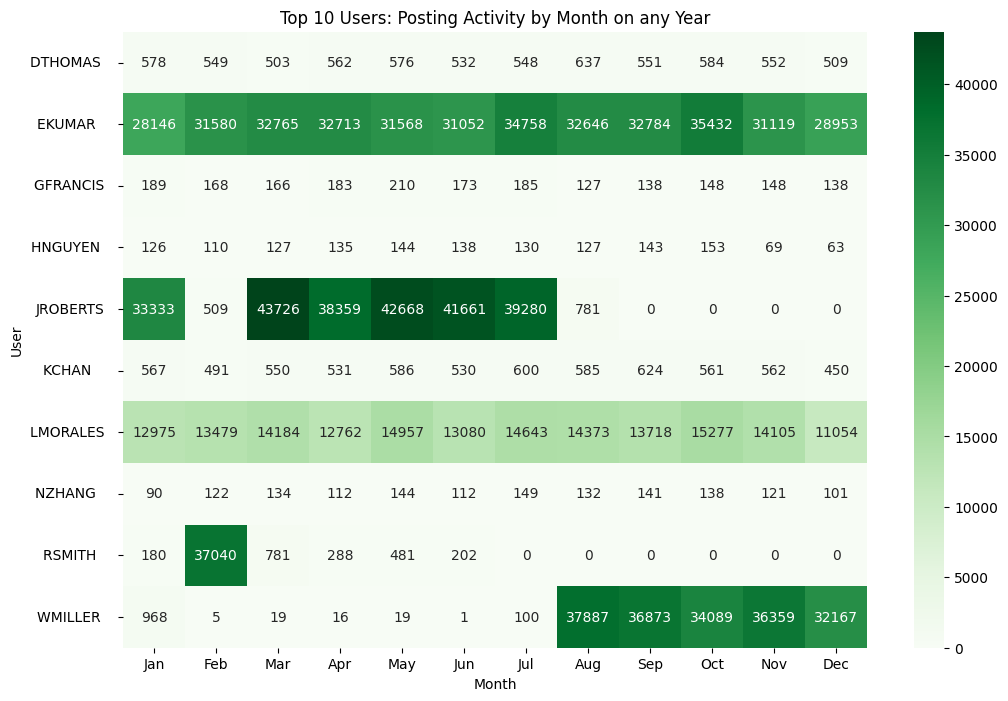

In [85]:
# -----------------------------
# Top 10 active users
# -----------------------------
top_users = df['Creatby'].value_counts().head(10).index
df_top = df[df['Creatby'].isin(top_users)]

# Aggregate postings by User x Month
user_month = df_top.pivot_table(
    index='Creatby',            # user
    columns='CreatedDt_Month',  # month
    values='PostAmount',        # counting postings
    aggfunc='count',
    fill_value=0
)

# Map month numbers to names
user_month.columns = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(user_month, annot=True, fmt='d', cmap='Greens')
plt.title('Top 10 Users: Posting Activity by Month on any Year')
plt.xlabel('Month')
plt.ylabel('User')
plt.show()


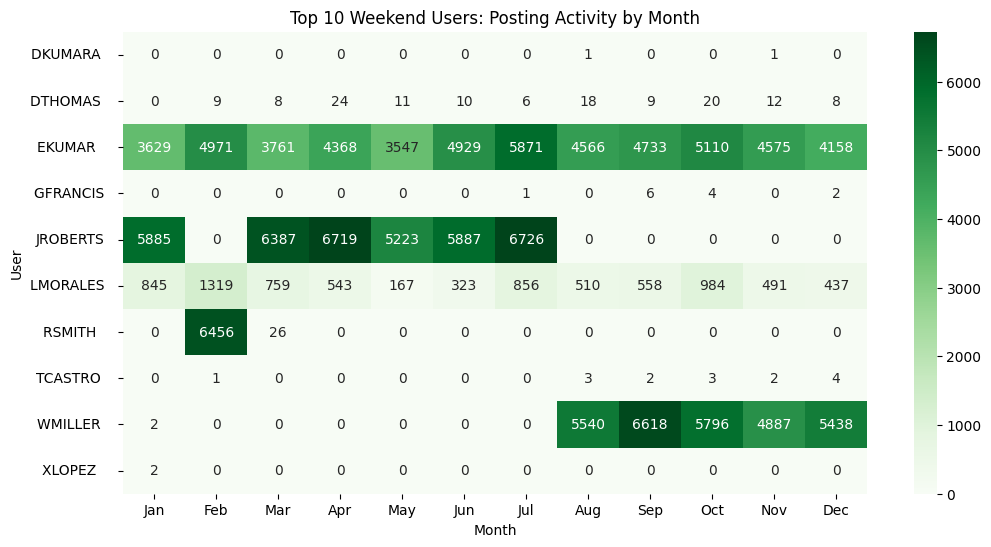

In [86]:
# Filter for weekend postings (Saturday=5, Sunday=6)
weekend_df = df[df['CreatedDt_DayOfWeek'].isin([5,6])]

# Aggregate: total postings per user on weekends
weekend_activity = weekend_df.groupby('Creatby').size().reset_index(name='WeekendPostings')
weekend_activity = weekend_activity.sort_values(by='WeekendPostings', ascending=False)
top_weekend_users = weekend_activity.head(10)['Creatby']

# Filter to top weekend users
df_top_weekend = weekend_df[weekend_df['Creatby'].isin(top_weekend_users)]

# Aggregate: postings by User x Month
user_month = df_top_weekend.pivot_table(
    index='Creatby',
    columns='CreatedDt_Month',
    values='PostAmount',  # count postings
    aggfunc='count',
    fill_value=0
)

# Reorder columns (1–12) and rename to month names
month_order = list(range(1,13))
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
user_month = user_month.reindex(columns=month_order, fill_value=0)
user_month.columns = month_names

# Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(user_month, annot=True, fmt='d', cmap='Greens')
plt.title('Top 10 Weekend Users: Posting Activity by Month')
plt.xlabel('Month')
plt.ylabel('User')
plt.show()


## 2. Account & GL Analysis

Objective: Examine posting volume and distribution by GL accounts.

### Tasks:

* Aggregate PostAmount and ForexAmt by GLCode and CostCtr.

* Identify top GL accounts by total postings or amounts.

* Check for anomalies in posting patterns.

### Observations

* Most GL codes in the top 10 in terms of volume have more or less stable trends. There had been some signifcant posting volumes to Promotional Claims and Terms (767 and 767) in the first and second quarters of 2023 - but has since trailed off.
* In terms of posting values, a significant cumulative posting had been done on GL codes 508 and 510 in the secod quarter of 2023. Since these are related to banking, it may be as a result of a cashflow repositioning exercise. The rest of the top 10 postings had taken a stable trend over the last 24 months

    GLCode              GL_Description  Postings
201    767      Promotional Claims V10    151460
200    766                   Terms V10    129597
0      100             Duty Paid Sales    119784
24     150              Duty Paid COGS    114463
17     125      Claims Base Case Deals    113081
14     120          Consolidated Terms    111934
7      109  Discount Gross Off Invoice    104181
18     126          Claims Terms Co-op     41955
167    550                   Inventory     15719
3      105           Ocean Spray Sales     14136


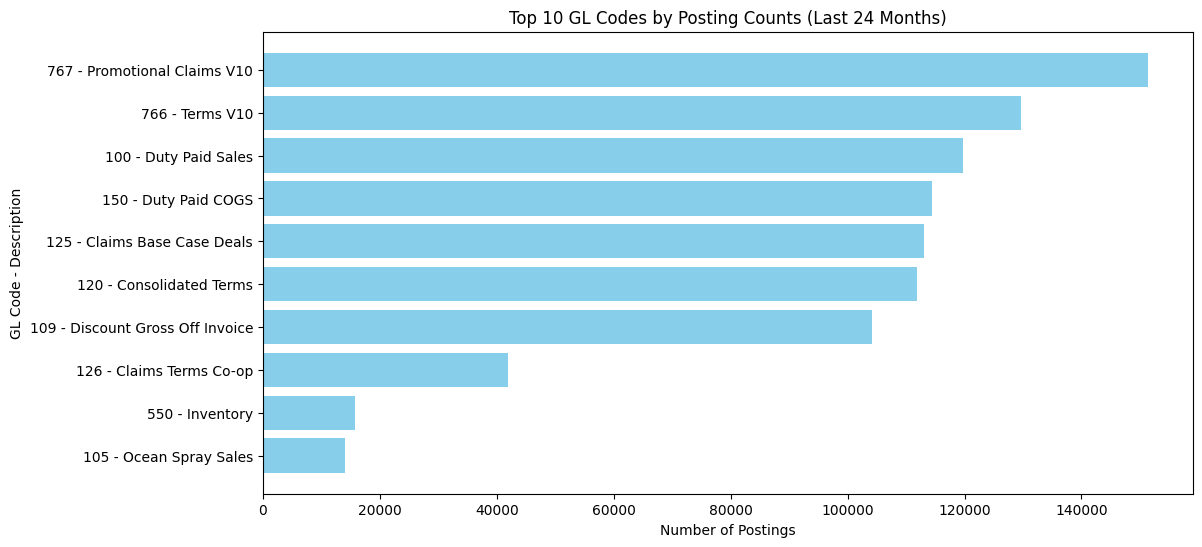

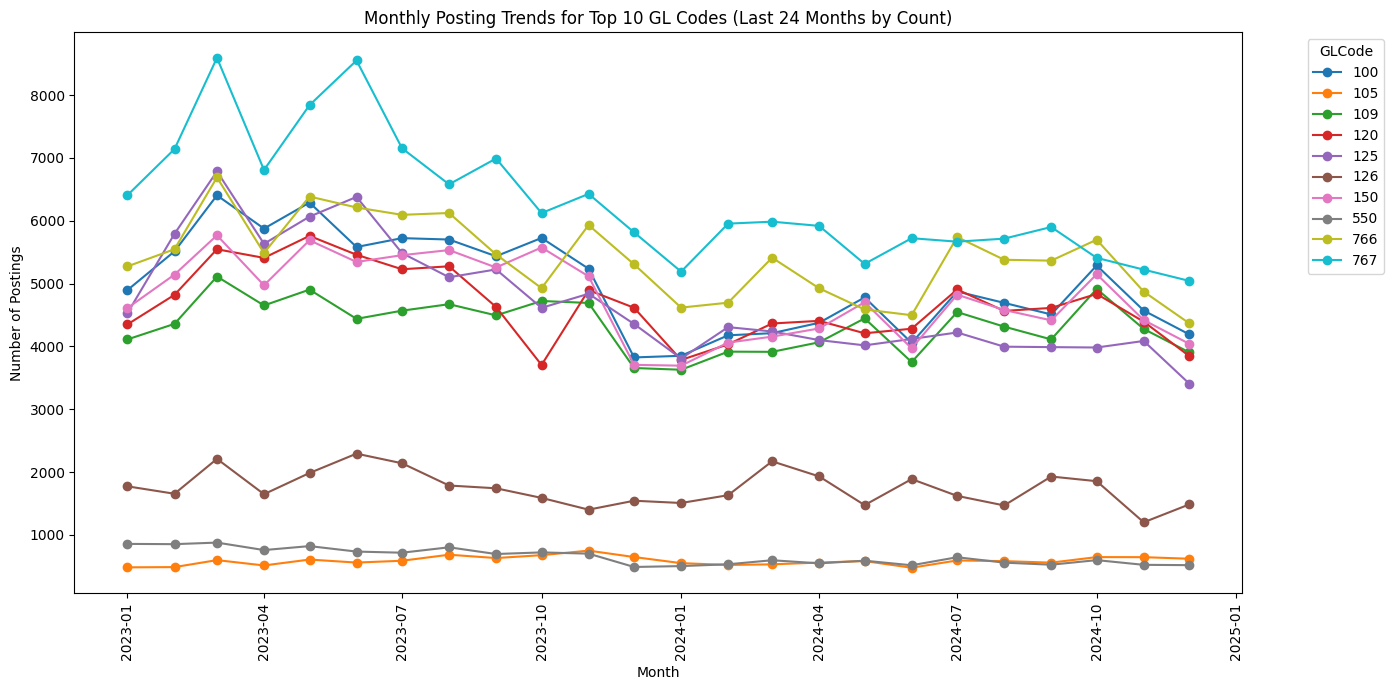

In [105]:

# --- Ensure CreatedDt is datetime ---
df['CreatedDt'] = pd.to_datetime(df['CreatedDt'], errors='coerce')

# --- Filter last 36 months ---
cutoff_date = df['CreatedDt'].max() - pd.DateOffset(months=36)
df_recent = df[df['CreatedDt'] >= cutoff_date]

# --- Top 10 GL Codes by posting count ---
gl_counts = (
    df_recent.groupby(['GLCode', 'GL_Description'])
    .size()
    .reset_index(name='Postings')
    .sort_values('Postings', ascending=False)
    .head(10)
)

print(gl_counts)

# --- Horizontal bar chart for top 10 GL Codes ---
plt.figure(figsize=(12,6))
plt.barh(gl_counts['GLCode'] + " - " + gl_counts['GL_Description'], gl_counts['Postings'], color='skyblue')
plt.title('Top 10 GL Codes by Posting Counts (Last 24 Months)')
plt.xlabel('Number of Postings')
plt.ylabel('GL Code - Description')
plt.gca().invert_yaxis()
plt.show()

# --- Month-by-month trend for top 10 GL Codes ---
top_glcodes = gl_counts['GLCode'].tolist()
df_top = df_recent[df_recent['GLCode'].isin(top_glcodes)].copy()

# Create Year-Month column for grouping
df_top['YearMonth'] = df_top['CreatedDt'].dt.to_period('M')

# Group by GLCode + YearMonth
monthly_trends = (
    df_top.groupby(['GLCode', 'GL_Description', 'YearMonth'])
    .size()
    .reset_index(name='Postings')
)

# Pivot for plotting
monthly_pivot = monthly_trends.pivot_table(
    index='YearMonth',
    columns='GLCode',
    values='Postings',
    fill_value=0
)

# Plot month-by-month line chart
plt.figure(figsize=(14,7))
for gl in monthly_pivot.columns:
    plt.plot(monthly_pivot.index.to_timestamp(), monthly_pivot[gl], marker='o', label=gl)

plt.title('Monthly Posting Trends for Top 10 GL Codes (Last 24 Months by Count)')
plt.xlabel('Month')
plt.ylabel('Number of Postings')
plt.xticks(rotation=90)
plt.legend(title='GLCode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


    GLCode               GL_Description  PostAmount_Million
145    520  Accounts Receivable Control             1475.08
140    508     Westpac Cash Reserve A/C             1221.52
182    700     Accounts Payable Control             1132.85
141    510                Westpac C/A -             1119.06
194    745                     Accruals              849.96
166    547         Westpac Business One              703.22
168    555             Stock in Transit              694.04
0      100              Duty Paid Sales              670.09
167    550                    Inventory              655.57
187    720    Goods Stored Not Invoiced              646.28


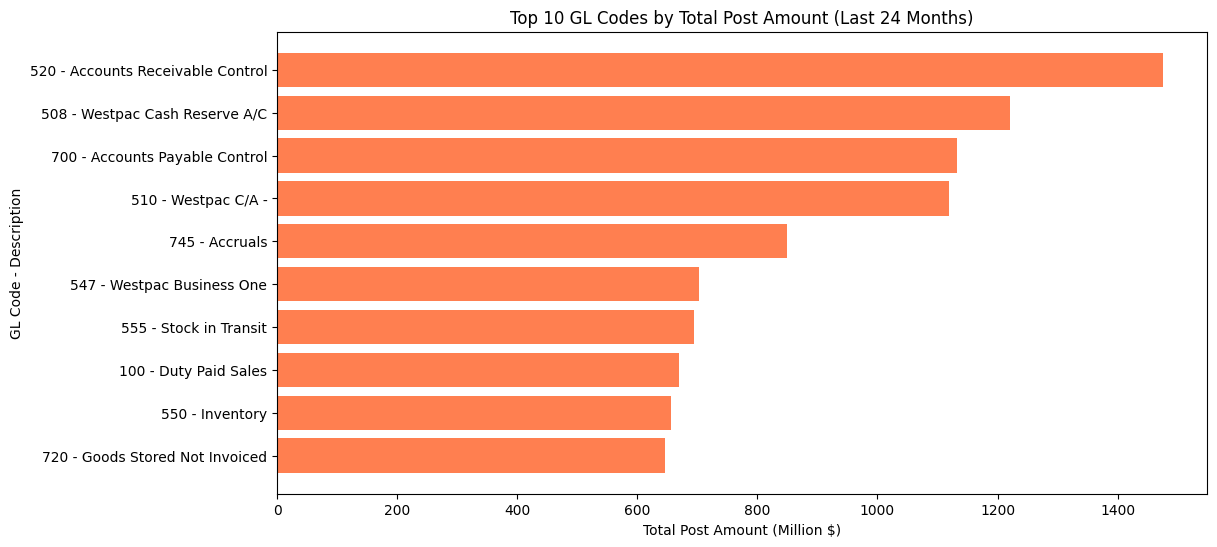

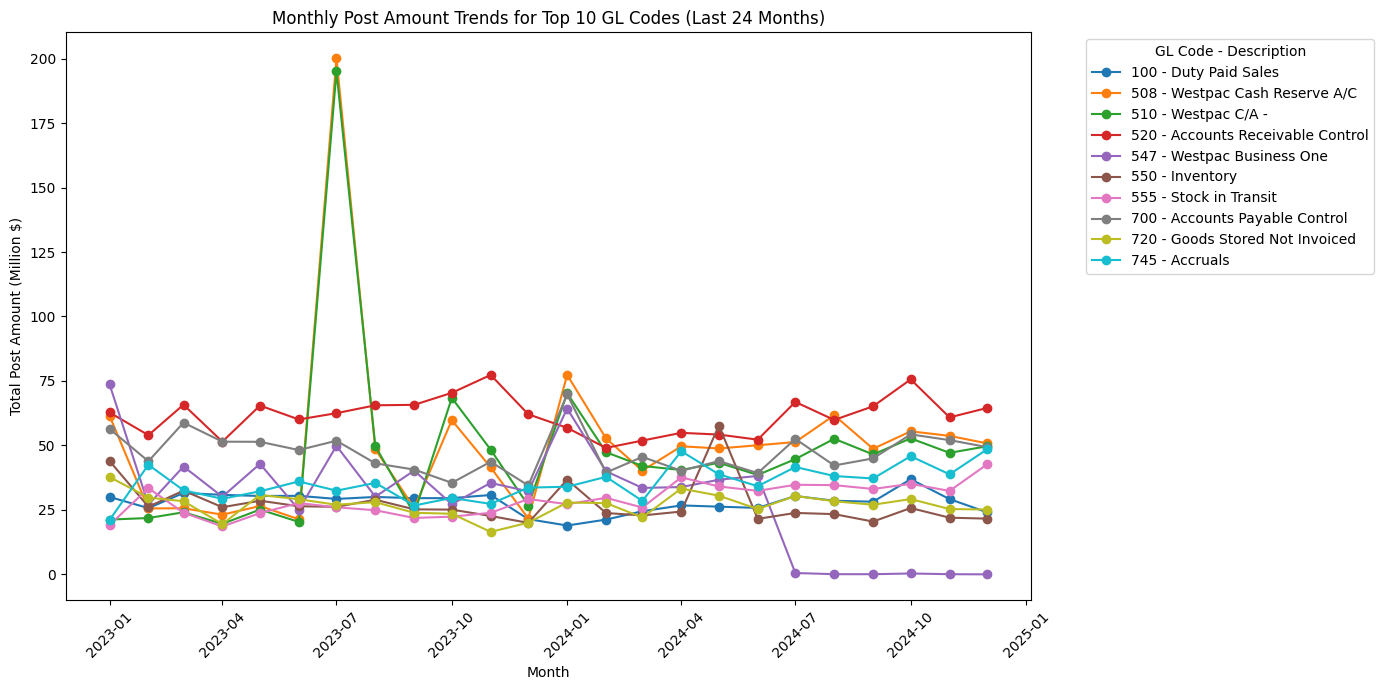

In [107]:
# --- Create a separate DataFrame for analysis ---
df_analysis = df.copy()

# --- Ensure CreatedDt is datetime ---
df_analysis['CreatedDt'] = pd.to_datetime(df_analysis['CreatedDt'], errors='coerce')

# --- Convert all PostAmount values to positive ---
df_analysis['PostAmount'] = df_analysis['PostAmount'].abs()

# --- Filter last 36 months ---
cutoff_date = df_analysis['CreatedDt'].max() - pd.DateOffset(months=36)
df_recent = df_analysis[df_analysis['CreatedDt'] >= cutoff_date]

# --- Top 10 GL Codes by total PostAmount (in millions) ---
gl_amounts = (
    df_recent.groupby(['GLCode', 'GL_Description'])['PostAmount']
    .sum()
    .reset_index()
)
gl_amounts['PostAmount_Million'] = (gl_amounts['PostAmount'] / 1e6).round(2)
gl_amounts = gl_amounts.sort_values('PostAmount', ascending=False).head(10)

print(gl_amounts[['GLCode','GL_Description','PostAmount_Million']])

# --- Horizontal bar chart ---
plt.figure(figsize=(12,6))
plt.barh(gl_amounts['GLCode'] + " - " + gl_amounts['GL_Description'], gl_amounts['PostAmount_Million'], color='coral')
plt.title('Top 10 GL Codes by Total Post Amount (Last 24 Months)')
plt.xlabel('Total Post Amount (Million $)')
plt.ylabel('GL Code - Description')
plt.gca().invert_yaxis()
plt.show()

# --- Month-by-month trend for top 10 GL Codes ---
top_glcodes = gl_amounts['GLCode'].tolist()
df_top = df_recent[df_recent['GLCode'].isin(top_glcodes)].copy()

# Year-Month column
df_top['YearMonth'] = df_top['CreatedDt'].dt.to_period('M')

# Group by GLCode + YearMonth and sum PostAmount
monthly_trends = (
    df_top.groupby(['GLCode', 'GL_Description', 'YearMonth'])['PostAmount']
    .sum()
    .reset_index()
)

# Convert to millions
monthly_trends['PostAmount_Million'] = monthly_trends['PostAmount'] / 1e6

# Create a new column combining GLCode and GL_Description
monthly_trends['GLCode_Desc'] = monthly_trends.apply(
    lambda x: f"{x['GLCode']} - {x['GL_Description']}", axis=1
)

# Pivot for plotting using the combined column
monthly_pivot = monthly_trends.pivot_table(
    index='YearMonth',
    columns='GLCode_Desc',   # columns are "GLCode - Description"
    values='PostAmount_Million',
    fill_value=0
)

# Plot month-by-month line chart
plt.figure(figsize=(14,7))
for gl in monthly_pivot.columns:
    plt.plot(monthly_pivot.index.to_timestamp(), monthly_pivot[gl], marker='o', label=gl)

plt.title('Monthly Post Amount Trends for Top 10 GL Codes (Last 24 Months)')
plt.xlabel('Month')
plt.ylabel('Total Post Amount (Million $)')
plt.xticks(rotation=45)
plt.legend(title='GL Code - Description', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## 3. Profitability Trends

Objective: Track performance metrics over time.

### Tasks:

* Calculate Gross Profit (GP), EBIT, Net Profit (NP) if relevant columns exist or can be derived.

* Aggregate profits by Year/Quarter/Month.

* Visualize profit trends over time.

* Compare profitability by Brand

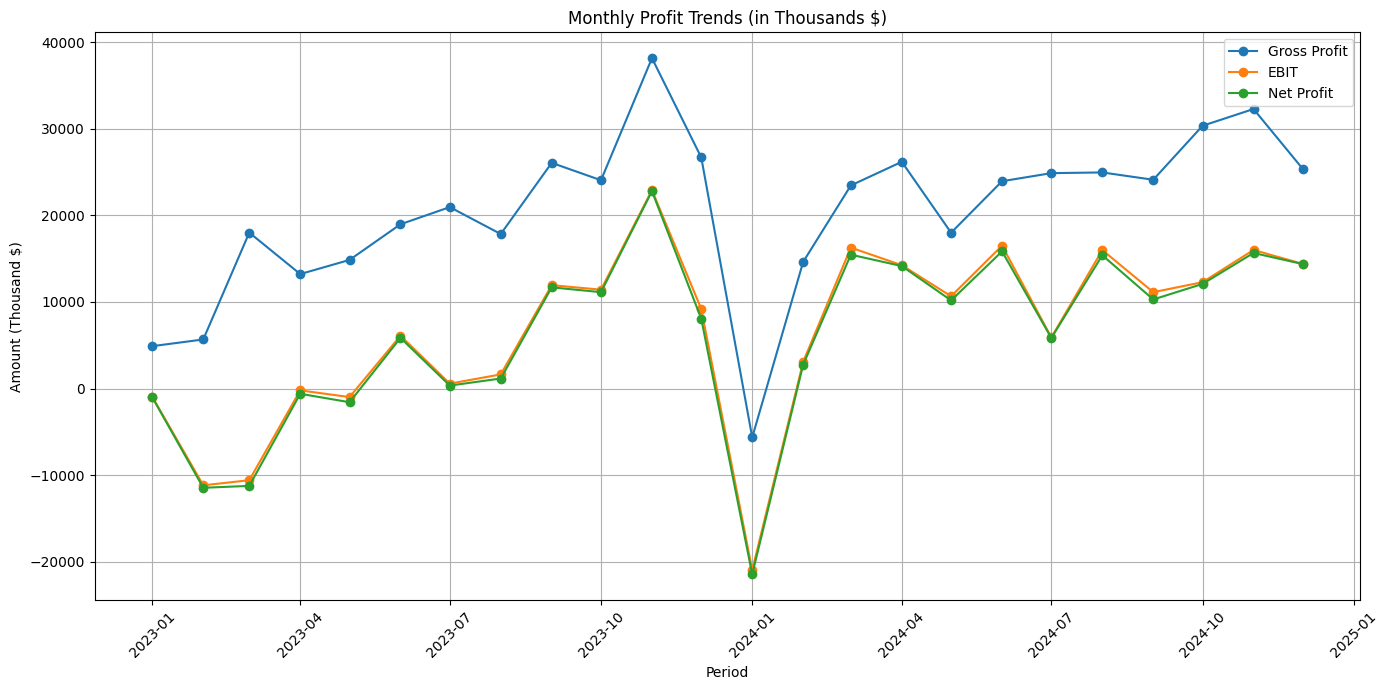

In [109]:
# -----------------------------
# Create a copy for profit analysis
df_profit = df.copy()

# -----------------------------
# Define relevant categories
gp_categories = ['Sales', 'Cost of sales']
ebit_expenses = [
    'National finance & administration exp',
    'Other type enpenses',
    'Direct selling expense',
    'Direct marketing expense',
    'Employee type enpenses'
]
np_expenses = ebit_expenses + ['Interest, tax & dividend expense']
other_income = ['Other income']

# -----------------------------
# Aggregate amounts per period (by Year and Month)
profit_df = df_profit.groupby(['CreatedDt_Year', 'CreatedDt_Month', 'AccGrpDesc'])['PostAmount'] \
              .sum().unstack(fill_value=0)

# -----------------------------
# Convert all PostAmount values to positive
profit_df = profit_df.abs()

# -----------------------------
# Calculate Gross Profit
profit_df['GrossProfit'] = profit_df.get('Sales', 0) - profit_df.get('Cost of sales', 0)

# Calculate EBIT
profit_df['EBIT'] = profit_df['GrossProfit'] \
    - profit_df[ebit_expenses].sum(axis=1) \
    + profit_df.get('Other income', 0)

# Calculate Net Profit
profit_df['NetProfit'] = profit_df['GrossProfit'] \
    - profit_df[np_expenses].sum(axis=1) \
    + profit_df.get('Other income', 0)

# -----------------------------
# Scale to thousands
profit_df['GrossProfit'] = profit_df['GrossProfit'] / 1000
profit_df['EBIT'] = profit_df['EBIT'] / 1000
profit_df['NetProfit'] = profit_df['NetProfit'] / 1000

# -----------------------------
# Reset index for easier plotting
profit_df = profit_df.reset_index()

# -----------------------------
# Create a datetime index for plotting
profit_df['Period'] = pd.to_datetime(
    profit_df['CreatedDt_Year'].astype(str) + '-' + 
    profit_df['CreatedDt_Month'].astype(str) + '-01'
)

# Sort by period just in case
profit_df = profit_df.sort_values('Period')

# -----------------------------
# Plot month-by-month trends
plt.figure(figsize=(14,7))
plt.plot(profit_df['Period'], profit_df['GrossProfit'], marker='o', label='Gross Profit')
plt.plot(profit_df['Period'], profit_df['EBIT'], marker='o', label='EBIT')
plt.plot(profit_df['Period'], profit_df['NetProfit'], marker='o', label='Net Profit')

plt.title('Monthly Profit Trends (in Thousands $)')
plt.xlabel('Period')
plt.ylabel('Amount (Thousand $)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\mirangaa\AppData\Local\Temp\ipykernel_22088\2849006494.py:32: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\mirangaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


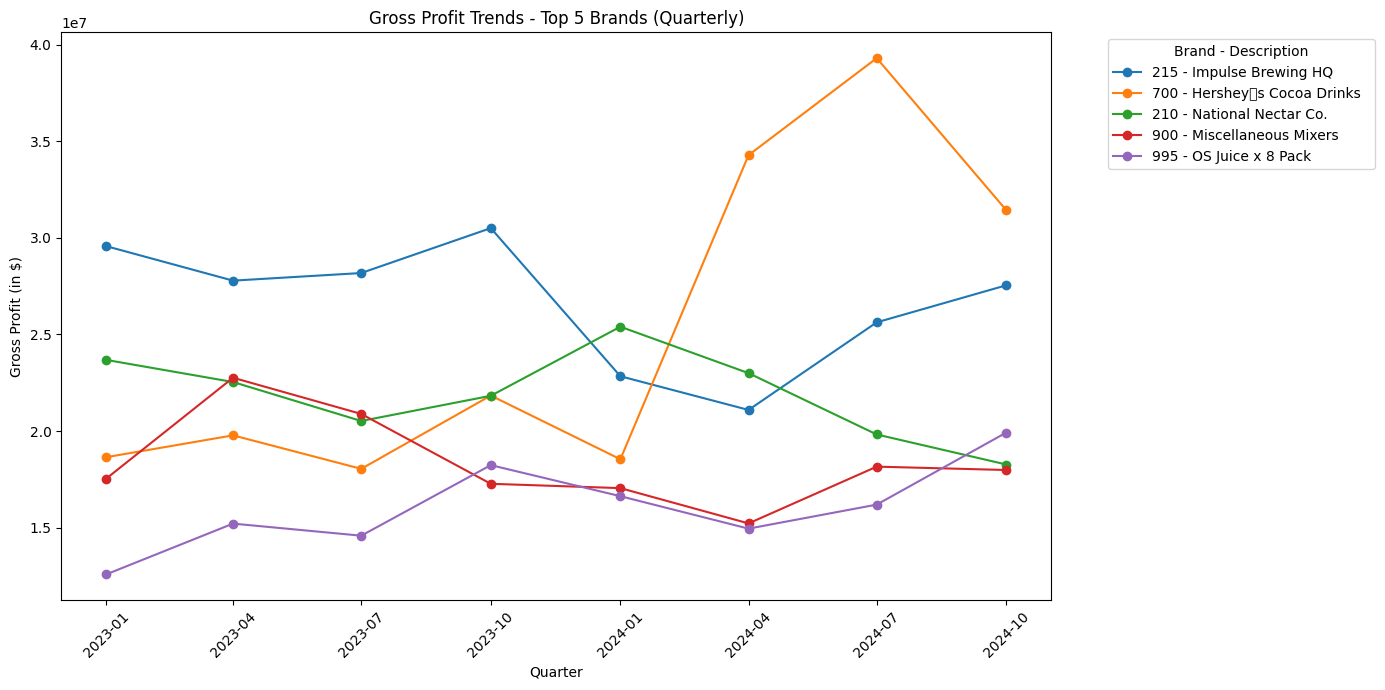

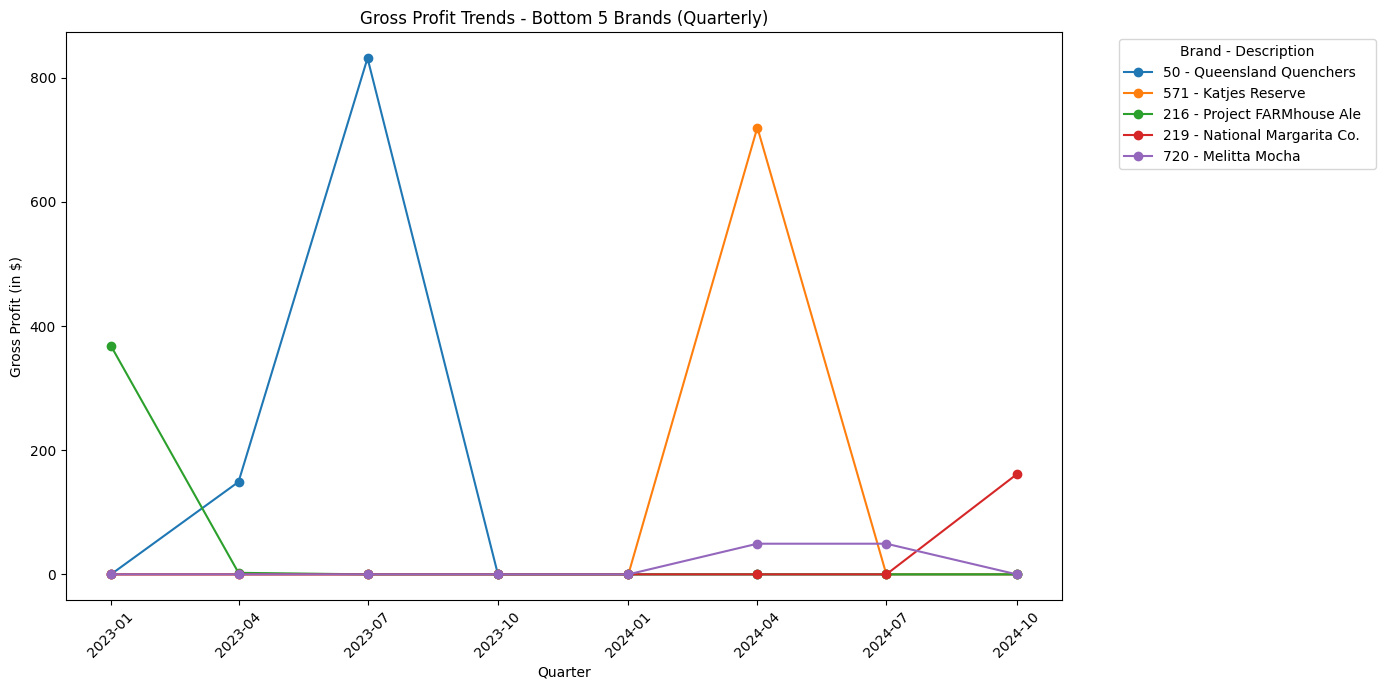

In [144]:

# --- Ensure CreatedDt is datetime ---
df['CreatedDt'] = pd.to_datetime(df['CreatedDt'], errors='coerce')

# --- Copy dataframe for GP calculation and convert PostAmount to positive ---
df_gp = df.copy()
df_gp['PostAmount'] = df_gp['PostAmount'].abs()

# --- Define relevant categories for GP ---
gp_categories = ['Sales', 'Cost of sales']

# --- Aggregate GP by Brand and Quarter ---
df_gp['YearQuarter'] = df_gp['CreatedDt'].dt.to_period('Q')
gp_agg = df_gp[df_gp['AccGrpDesc'].isin(gp_categories)] \
           .groupby(['YearQuarter', 'Brand', 'Brand_Description'])['PostAmount'] \
           .sum().unstack(['Brand', 'Brand_Description'], fill_value=0)

# --- Calculate total GP per brand for top/bottom selection ---
total_gp = gp_agg.sum().sort_values(ascending=False)

# --- Top 5 brands ---
top5_brands = total_gp.head(5).index
gp_top5 = gp_agg[top5_brands]

plt.figure(figsize=(14,7))
for brand in gp_top5.columns:
    plt.plot(gp_top5.index.to_timestamp(), gp_top5[brand], marker='o', label=f"{brand[0]} - {brand[1]}")
plt.title('Gross Profit Trends - Top 5 Brands (Quarterly)')
plt.xlabel('Quarter')
plt.ylabel('Gross Profit (in $)')
plt.xticks(rotation=45)
plt.legend(title='Brand - Description', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- Bottom 5 brands ---
bottom5_brands = total_gp.tail(5).index
gp_bottom5 = gp_agg[bottom5_brands]

plt.figure(figsize=(14,7))
for brand in gp_bottom5.columns:
    plt.plot(gp_bottom5.index.to_timestamp(), gp_bottom5[brand], marker='o', label=f"{brand[0]} - {brand[1]}")
plt.title('Gross Profit Trends - Bottom 5 Brands (Quarterly)')
plt.xlabel('Quarter')
plt.ylabel('Gross Profit (in $)')
plt.xticks(rotation=45)
plt.legend(title='Brand - Description', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Key Finance Ratios



## Profitability Ratios
* Gross Margin (%)
* Operatin Margin (%)
* Net Margin (%)

## Liquidity/Efficieny and Leverage Ratios
* These cannot be calculated as each ratio requires a balance sheet opening or closing balance. The dataset used in this exercise is a movement for years 2023 and 2025 and doesnt have the opening or closing positions

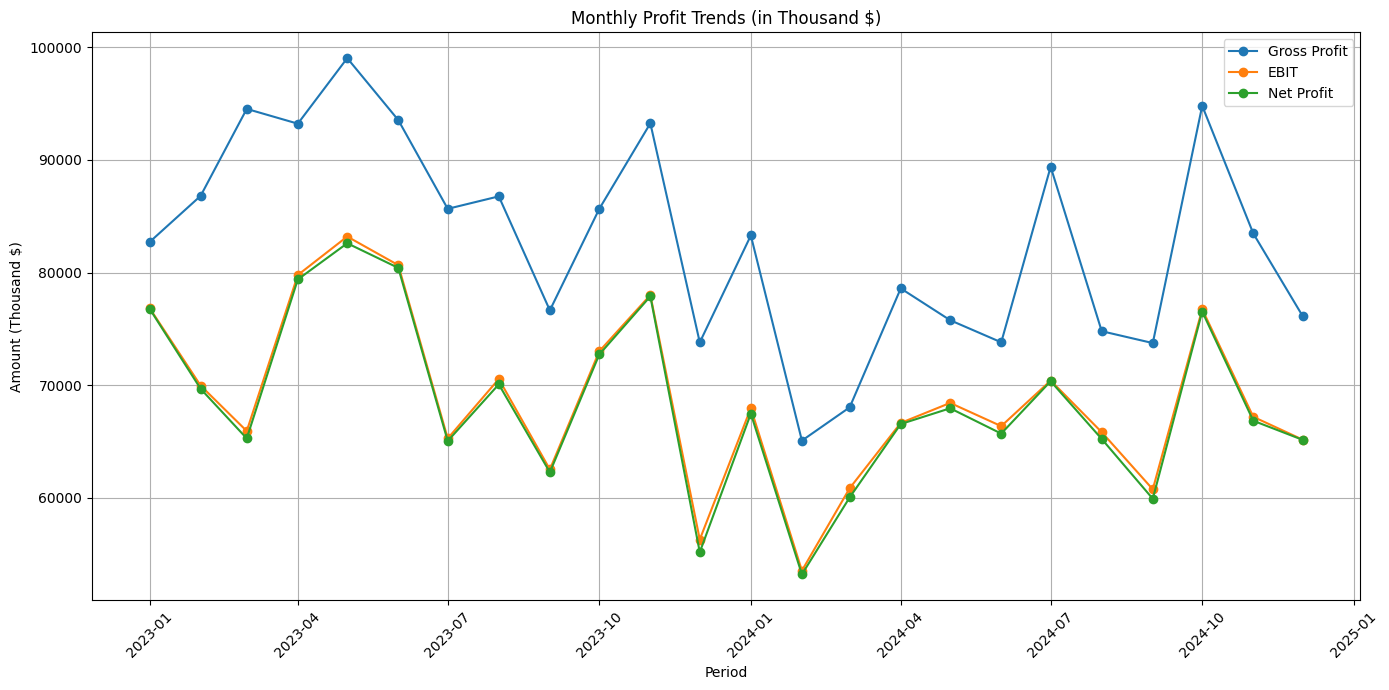

In [143]:
# -----------------------------
# Copy original df for profit analysis
df_profit = df.copy()

# -----------------------------
# Ensure CreatedDt is datetime
df_profit['CreatedDt'] = pd.to_datetime(df_profit['CreatedDt'], errors='coerce')

# -----------------------------
# Convert PostAmount to positive for profit calculations
df_profit['PostAmount'] = df_profit['PostAmount'].abs()

# -----------------------------
# Define categories
gp_categories = ['Sales', 'Cost of sales']
ebit_expenses = [
    'National finance & administration exp',
    'Other type enpenses',
    'Direct selling expense',
    'Direct marketing expense',
    'Employee type enpenses'
]
np_expenses = ebit_expenses + ['Interest, tax & dividend expense']
other_income = ['Other income']
asset_categories = ['Current assets', 'Non current assets']
equity_categories = ['Equity & reserves']

# -----------------------------
# Aggregate amounts by Year and Month
profit_df = df_profit.groupby(['CreatedDt_Year', 'CreatedDt_Month', 'AccGrpDesc'])['PostAmount'] \
              .sum().unstack(fill_value=0)

# -----------------------------
# Calculate Gross Profit
profit_df['GrossProfit'] = profit_df.get('Sales', 0) + profit_df.get('Cost of sales', 0)

# Calculate EBIT
profit_df['EBIT'] = profit_df['GrossProfit'] - profit_df[ebit_expenses].sum(axis=1) + profit_df.get('Other income', 0)

# Calculate Net Profit
profit_df['NetProfit'] = profit_df['GrossProfit'] - profit_df[np_expenses].sum(axis=1) + profit_df.get('Other income', 0)

# -----------------------------
# Convert to positive and scale to thousands
profit_df[['GrossProfit', 'EBIT', 'NetProfit']] = profit_df[['GrossProfit', 'EBIT', 'NetProfit']].abs() / 1000

# -----------------------------
# Reset index and create datetime period
profit_df = profit_df.reset_index()
profit_df['Period'] = pd.to_datetime(profit_df['CreatedDt_Year'].astype(str) + '-' +
                                     profit_df['CreatedDt_Month'].astype(str) + '-01')
profit_df = profit_df.sort_values('Period')

# -----------------------------
# Plot monthly profit trends
plt.figure(figsize=(14,7))
plt.plot(profit_df['Period'], profit_df['GrossProfit'], marker='o', label='Gross Profit')
plt.plot(profit_df['Period'], profit_df['EBIT'], marker='o', label='EBIT')
plt.plot(profit_df['Period'], profit_df['NetProfit'], marker='o', label='Net Profit')
plt.title('Monthly Profit Trends (in Thousand $)')
plt.xlabel('Period')
plt.ylabel('Amount (Thousand $)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# -----------------------------
# Cumulative ROA/ROE by Quarter (new DataFrame)
df_cum = df.copy()
df_cum['CreatedDt'] = pd.to_datetime(df_cum['CreatedDt'], errors='coerce')
df_cum['PostAmount'] = df_cum['PostAmount'].abs()

# Aggregate amounts by Year and Quarter
agg_quarter = df_cum.groupby(['CreatedDt_Year', 'CreatedDt_Quarter', 'AccGrpDesc'])['PostAmount'] \
                    .sum().unstack(fill_value=0)

# Cumulative totals along quarters
agg_quarter['TotalAssets'] = agg_quarter[asset_categories].sum(axis=1).groupby(level=0).cumsum()
agg_quarter['TotalEquity'] = agg_quarter[equity_categories].sum(axis=1).groupby(level=0).cumsum()

# Calculate Gross Profit per quarter
agg_quarter['GrossProfit'] = agg_quarter.get('Sales', 0) + agg_quarter.get('Cost of sales', 0)


## Additional Analysis

## Total Sales vs COGS by Brand

C:\Users\mirangaa\AppData\Local\Temp\ipykernel_22088\2217083682.py:51: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\mirangaa\AppData\Local\Temp\ipykernel_22088\2217083682.py:51: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\mirangaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\mirangaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


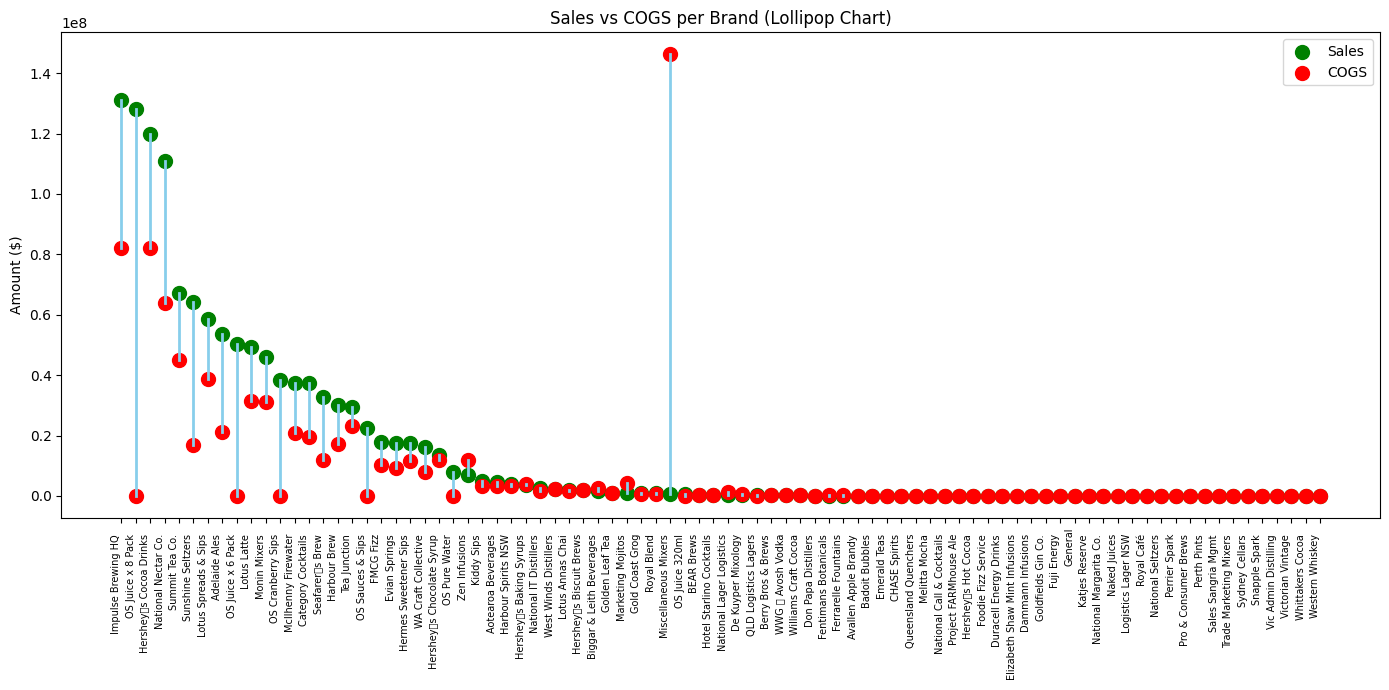

In [142]:

# -----------------------------
# Make a copy of the dataframe for this analysis
df_lollipop = df.copy()

# Ensure PostAmount is positive
df_lollipop['PostAmount'] = df_lollipop['PostAmount'].abs()

# -----------------------------
# Aggregate Sales and COGS per Brand
cogs_categories = ['Cost of sales']
sales_categories = ['Sales']

brand_agg = df_lollipop.groupby('Brand_Description')['PostAmount'].sum()  # placeholder

# Create pivot table for Sales and COGS per brand
brand_pivot = df_lollipop.pivot_table(
    index='Brand_Description',
    columns='AccGrpDesc',
    values='PostAmount',
    aggfunc='sum',
    fill_value=0
)

# Keep only Sales and COGS
brand_pivot = brand_pivot[['Sales', 'Cost of sales']]

# Sort descending by Sales
brand_pivot = brand_pivot.sort_values('Sales', ascending=False)

# -----------------------------
# Plot lollipop chart
plt.figure(figsize=(14,7))

# Loop through brands
for i, brand in enumerate(brand_pivot.index):
    sales = brand_pivot.loc[brand, 'Sales']
    cogs = brand_pivot.loc[brand, 'Cost of sales']
    
    # Draw line
    plt.plot([i, i], [cogs, sales], color='skyblue', lw=2)
    
    # Draw points
    plt.scatter(i, sales, color='green', s=100, label='Sales' if i==0 else "")
    plt.scatter(i, cogs, color='red', s=100, label='COGS' if i==0 else "")

# Labels and ticks
plt.xticks(range(len(brand_pivot.index)), brand_pivot.index, rotation=90, ha='right', fontsize=7)  # smaller font
plt.ylabel('Amount ($)')
plt.title('Sales vs COGS per Brand (Lollipop Chart)')
plt.legend()
plt.tight_layout()
plt.show()


## Correlation Analysis
### Marketing Spend vs Revenue

#### Observation
* The correlation is tending towards the weaker side. Signalling a captive customer base or a specified offering that does not warrant a lot of marketing

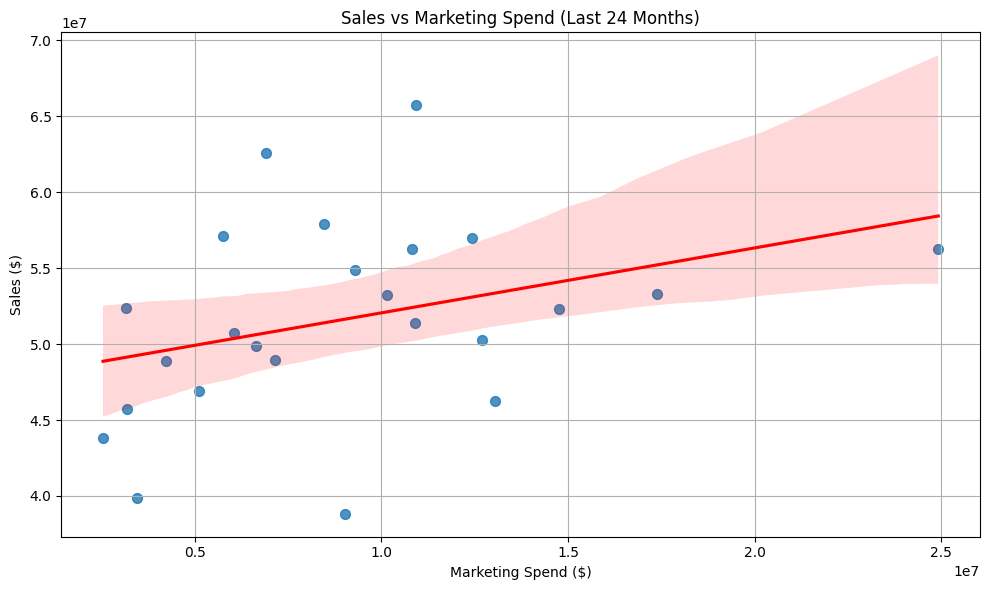

Correlation coefficient (Sales vs Marketing Spend): 0.35


In [141]:
# -----------------------------
# Ensure CreatedDt is datetime
df['CreatedDt'] = pd.to_datetime(df['CreatedDt'], errors='coerce')

# -----------------------------
# Filter last 24 months
cutoff_date = df['CreatedDt'].max() - pd.DateOffset(months=24)
df_recent = df[df['CreatedDt'] >= cutoff_date].copy()

# -----------------------------
# Aggregate monthly Sales and Marketing Spend
monthly_agg = df_recent.groupby(['CreatedDt_Year', 'CreatedDt_Month', 'AccGrpDesc'])['PostAmount'] \
                .sum().unstack(fill_value=0).reset_index()

# Rename for clarity
monthly_agg.rename(columns={'Sales':'Sales', 'Direct marketing expense':'MarketingSpend'}, inplace=True)

# -----------------------------
# Create a period column for plotting
monthly_agg['Period'] = pd.to_datetime(monthly_agg['CreatedDt_Year'].astype(str) + '-' + 
                                       monthly_agg['CreatedDt_Month'].astype(str) + '-01')

# -----------------------------
# Scatter plot with regression line
plt.figure(figsize=(10,6))
sns.regplot(x='MarketingSpend', y='Sales', data=monthly_agg, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Sales vs Marketing Spend (Last 24 Months)')
plt.xlabel('Marketing Spend ($)')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

# -----------------------------
# Calculate correlation coefficient
corr = monthly_agg[['Sales','MarketingSpend']].corr().iloc[0,1]
print(f"Correlation coefficient (Sales vs Marketing Spend): {corr:.2f}")
